In [102]:
import pandas

data = pandas.read_csv("1976-2020-president.csv")
#print(data.head())
data["Rank"] = data.groupby(["state","year"])["candidatevotes"].rank(method="min", ascending=False)
data.head(10)


,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,Rank
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT,1.0
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN,2.0
2,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,False,9198,1182850,20210113,NaN,OTHER,3.0
3,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,False,6669,1182850,20210113,NaN,OTHER,4.0
4,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"HALL, GUS",COMMUNIST PARTY USE,False,1954,1182850,20210113,NaN,OTHER,5.0
5,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MACBRIDE, ROGER",LIBERTARIAN,False,1481,1182850,20210113,NaN,LIBERTARIAN,6.0
6,1976,ALABAMA,AL,1,63,41,US PRESIDENT,NaN,NaN,True,308,1182850,20210113,NaN,OTHER,7.0
7,1976,ALASKA,AK,2,94,81,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,71555,123574,20210113,NaN,REPUBLICAN,1.0
8,1976,ALASKA,AK,2,94,81,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,44058,123574,20210113,NaN,DEMOCRAT,2.0
9,1976,ALASKA,AK,2,94,81,US PRESIDENT,"MACBRIDE, ROGER",LIBERTARIAN,False,6785,123574,20210113,NaN,LIBERTARIAN,3.0


In [103]:
winners= data[data["Rank"]==1.0]
winners.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,Rank
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT,1.0
7,1976,ALASKA,AK,2,94,81,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,71555,123574,20210113,NaN,REPUBLICAN,1.0
11,1976,ARIZONA,AZ,4,86,61,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,418642,742719,20210113,NaN,REPUBLICAN,1.0
19,1976,ARKANSAS,AR,5,71,42,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,498604,767535,20210113,NaN,DEMOCRAT,1.0
23,1976,CALIFORNIA,CA,6,93,71,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,3882244,7803770,20210113,NaN,REPUBLICAN,1.0


In [104]:
winners_sorted = winners.sort_values(["state", "year"])
winners_sorted["PS Previous Year"] = winners_sorted.groupby(["state"])["party_simplified"].shift(1)
winners_sorted.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,Rank,PS Previous Year
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT,1.0,NaN
332,1980,ALABAMA,AL,1,63,41,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,654192,1341929,20210113,NaN,REPUBLICAN,1.0,DEMOCRAT
696,1984,ALABAMA,AL,1,63,41,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,872849,1441713,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN
1019,1988,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE H.W.",REPUBLICAN,False,815576,1378476,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN
1304,1992,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE H.W.",REPUBLICAN,False,804283,1688060,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN


In [105]:
import numpy
# numpy.where(podmínka, hodnota_když_podmínka_platí, hodnota_když_podmínka_neplatí)
winners_sorted["change"] = numpy.where(winners_sorted["party_simplified"] == winners_sorted["PS Previous Year"], 0, 1)
winners_check = winners_sorted[winners_sorted["state"] == "IDAHO"]
winners_check

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,Rank,PS Previous Year,change
65,1976,IDAHO,ID,16,82,63,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,204151,340932,20210113,NaN,REPUBLICAN,1.0,NaN,1
412,1980,IDAHO,ID,16,82,63,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,290699,437431,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0
765,1984,IDAHO,ID,16,82,63,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,297523,411144,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0
1085,1988,IDAHO,ID,16,82,63,US PRESIDENT,"BUSH, GEORGE H.W.",REPUBLICAN,False,253881,408968,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0
1385,1992,IDAHO,ID,16,82,63,US PRESIDENT,"BUSH, GEORGE H.W.",REPUBLICAN,False,202645,482114,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0
1767,1996,IDAHO,ID,16,82,63,US PRESIDENT,"DOLE, ROBERT",REPUBLICAN,False,256595,491711,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0
2128,2000,IDAHO,ID,16,82,63,US PRESIDENT,"BUSH, GEORGE W.",REPUBLICAN,False,336937,501615,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0
2488,2004,IDAHO,ID,16,82,63,US PRESIDENT,"BUSH, GEORGE W.",REPUBLICAN,False,409235,598376,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0
2817,2008,IDAHO,ID,16,82,63,US PRESIDENT,"MCCAIN, JOHN",REPUBLICAN,False,403012,655122,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0
3157,2012,IDAHO,ID,16,82,63,US PRESIDENT,"ROMNEY, MITT",REPUBLICAN,False,420911,652274,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0


In [106]:
winners_pivot = winners_sorted.dropna(axis=0, subset="PS Previous Year")
winners_pivot

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,Rank,PS Previous Year,change
332,1980,ALABAMA,AL,1,63,41,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,654192,1341929,20210113,NaN,REPUBLICAN,1.0,DEMOCRAT,1
696,1984,ALABAMA,AL,1,63,41,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,872849,1441713,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0
1019,1988,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE H.W.",REPUBLICAN,False,815576,1378476,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0
1304,1992,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE H.W.",REPUBLICAN,False,804283,1688060,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0
1674,1996,ALABAMA,AL,1,63,41,US PRESIDENT,"DOLE, ROBERT",REPUBLICAN,False,769044,1534349,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2722,2004,WYOMING,WY,56,83,68,US PRESIDENT,"BUSH, GEORGE W.",REPUBLICAN,False,167629,243861,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0
3073,2008,WYOMING,WY,56,83,68,US PRESIDENT,"MCCAIN, JOHN",REPUBLICAN,False,164958,254904,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0
3388,2012,WYOMING,WY,56,83,68,US PRESIDENT,"ROMNEY, MITT",REPUBLICAN,False,170962,250701,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0
3732,2016,WYOMING,WY,56,83,68,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,174419,258788,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0


In [107]:
data_pivot = winners_pivot.groupby(["state"])["change"].sum()
data_pivot = pandas.DataFrame(data_pivot)
data_pivot = data_pivot.sort_values("change", ascending=False)
data_pivot

,change
state,
OHIO,5
FLORIDA,5
GEORGIA,4
WISCONSIN,4
IOWA,4
PENNSYLVANIA,4
NEVADA,3
TENNESSEE,3
LOUISIANA,3


<Axes: xlabel='state'>

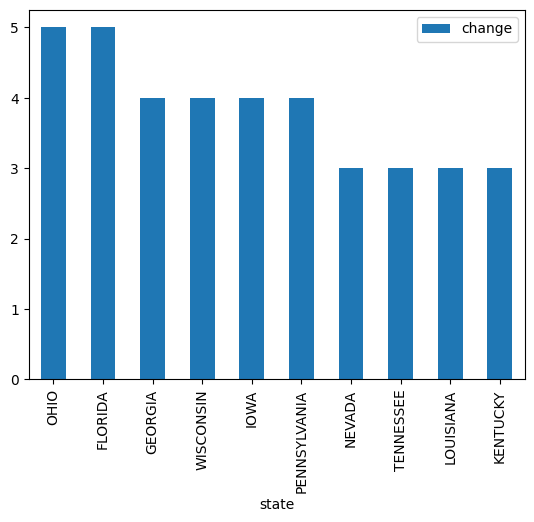

In [110]:
data_viz = data_pivot.iloc[:10]
data_viz.plot(kind="bar")

In [109]:
#Pro další část pracuj s tabulkou se dvěma nejúspěšnějšími kandidáty pro každý rok a stát (tj. s tabulkou, která oproti té minulé neobsahuje jen vítěze, ale i druhého v pořadí).
#Přidej do tabulky sloupec, který obsahuje absolutní rozdíl mezi vítězem a druhým v pořadí.
data_margin = data.sort_values(["state", "year","Rank"])
data_margin["second_candidate_votes"]= data.groupby(["state"])["candidatevotes"].shift(-1)
data_margin.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,Rank,second_candidate_votes
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT,1.0,504070.0
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN,2.0,9198.0
2,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,False,9198,1182850,20210113,NaN,OTHER,3.0,6669.0
3,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,False,6669,1182850,20210113,NaN,OTHER,4.0,1954.0
4,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"HALL, GUS",COMMUNIST PARTY USE,False,1954,1182850,20210113,NaN,OTHER,5.0,1481.0


In [111]:
#Přidej sloupec s relativním marginem, tj. rozdílem vyděleným počtem hlasů.
data_margin = data_margin[data_margin["Rank"]==1.0]
data_margin["margin"] = data_margin["candidatevotes"] - data_margin["second_candidate_votes"]
data_margin["relative_margin"] = data_margin["margin"]/data_margin["totalvotes"]
data_margin

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,Rank,second_candidate_votes,margin,relative_margin
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT,1.0,504070.0,155100.0,0.131124
332,1980,ALABAMA,AL,1,63,41,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,654192,1341929,20210113,NaN,REPUBLICAN,1.0,636730.0,17462.0,0.013013
696,1984,ALABAMA,AL,1,63,41,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,872849,1441713,20210113,NaN,REPUBLICAN,1.0,551899.0,320950.0,0.222617
1019,1988,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE H.W.",REPUBLICAN,False,815576,1378476,20210113,NaN,REPUBLICAN,1.0,549506.0,266070.0,0.193018
1304,1992,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE H.W.",REPUBLICAN,False,804283,1688060,20210113,NaN,REPUBLICAN,1.0,690080.0,114203.0,0.067653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2722,2004,WYOMING,WY,56,83,68,US PRESIDENT,"BUSH, GEORGE W.",REPUBLICAN,False,167629,243861,20210113,NaN,REPUBLICAN,1.0,70776.0,96853.0,0.397165
3073,2008,WYOMING,WY,56,83,68,US PRESIDENT,"MCCAIN, JOHN",REPUBLICAN,False,164958,254904,20210113,NaN,REPUBLICAN,1.0,82868.0,82090.0,0.322043
3388,2012,WYOMING,WY,56,83,68,US PRESIDENT,"ROMNEY, MITT",REPUBLICAN,False,170962,250701,20210113,NaN,REPUBLICAN,1.0,69286.0,101676.0,0.405567
3732,2016,WYOMING,WY,56,83,68,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,174419,258788,20210113,NaN,REPUBLICAN,1.0,55973.0,118446.0,0.457695


In [112]:
#Seřaď tabulku podle velikosti relativního marginu a zjisti, kdy a ve kterém státě byl výsledek voleb nejtěsnější.
data_margin_sorted = data_margin.sort_values("relative_margin")
data_margin_sorted

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,Rank,second_candidate_votes,margin,relative_margin
2106,2000,FLORIDA,FL,12,59,43,US PRESIDENT,"BUSH, GEORGE W.",REPUBLICAN,False,2912790,5963110,20210113,NaN,REPUBLICAN,1.0,2912253.0,537.0,0.000090
2266,2000,NEW MEXICO,NM,35,85,66,US PRESIDENT,"GORE, AL",DEMOCRAT,False,286783,598605,20210113,NaN,DEMOCRAT,1.0,286417.0,366.0,0.000611
2907,2008,MISSOURI,MO,29,43,34,US PRESIDENT,"MCCAIN, JOHN",REPUBLICAN,False,1445814,2925205,20210113,NaN,REPUBLICAN,1.0,1441911.0,3903.0,0.001334
479,1980,MASSACHUSETTS,MA,25,14,3,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,1057631,2524090,20210113,NaN,REPUBLICAN,1.0,1053802.0,3829.0,0.001517
241,1976,OREGON,OR,41,92,72,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,492120,1029876,20210113,NaN,REPUBLICAN,1.0,490407.0,1713.0,0.001663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2465,2004,DISTRICT OF COLUMBIA,DC,11,53,55,US PRESIDENT,"KERRY, JOHN",DEMOCRAT,False,202970,227586,20210113,NaN,DEMOCRAT,1.0,21256.0,181714.0,0.798441
3130,2012,DISTRICT OF COLUMBIA,DC,11,53,55,US PRESIDENT,"OBAMA, BARACK H.",DEMOCRAT,False,267070,293764,20210113,NaN,DEMOCRAT,1.0,21381.0,245689.0,0.836348
2785,2008,DISTRICT OF COLUMBIA,DC,11,53,55,US PRESIDENT,"OBAMA, BARACK H.",DEMOCRAT,False,245800,265853,20210113,NaN,DEMOCRAT,1.0,17367.0,228433.0,0.859246
3460,2016,DISTRICT OF COLUMBIA,DC,11,53,55,US PRESIDENT,"CLINTON, HILLARY",DEMOCRAT,False,282830,312575,20210113,NaN,DEMOCRAT,1.0,12723.0,270107.0,0.864135


In [113]:
import pandas

def evaluate_results(row):
    row = row.loc[["party_simplified", "PS Previous Year"]]
    if row["party_simplified"] == "REPUBLICAN" and row["PS Previous Year"] == "DEMOCRAT":
        return "to Rep."
    elif row["party_simplified"] == "DEMOCRAT" and row["PS Previous Year"] == "REPUBLICAN":
        return "to Dem."
    else:
        return "no swing"
    
winners_pivot["swing"] = winners_pivot.apply(evaluate_results, axis=1)
winners_pivot.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_4620\3385424402.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winners_pivot["swing"] = winners_pivot.apply(evaluate_results, axis=1)


,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,Rank,PS Previous Year,change,swing
332,1980,ALABAMA,AL,1,63,41,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,654192,1341929,20210113,NaN,REPUBLICAN,1.0,DEMOCRAT,1,to Rep.
696,1984,ALABAMA,AL,1,63,41,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,872849,1441713,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0,no swing
1019,1988,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE H.W.",REPUBLICAN,False,815576,1378476,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0,no swing
1304,1992,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE H.W.",REPUBLICAN,False,804283,1688060,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0,no swing
1674,1996,ALABAMA,AL,1,63,41,US PRESIDENT,"DOLE, ROBERT",REPUBLICAN,False,769044,1534349,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0,no swing


In [177]:
#Vytvoř pivot tabulku, která zobrazí pro jednotlivé volební roky, kolik států přešlo od Republikánské strany k Demokratické straně, kolik států přešlo od Demokratické strany k Republikánské straně a kolik států volilo kandidáta stejné strany.
data_pivot = winners_pivot.groupby(["year","swing"]).count()
data_pivot = pandas.pivot_table(data_pivot, columns = "swing", index = "year", aggfunc = "sum", values = "Rank"
data_pivot

swing,no swing,to Dem.,to Rep.
year,,,
1980,35.0,NaN,16.0
1984,45.0,NaN,6.0
1988,42.0,9.0,NaN
1992,29.0,22.0,NaN
1996,46.0,2.0,3.0
2000,40.0,NaN,11.0
2004,48.0,1.0,2.0
2008,42.0,9.0,NaN
2012,49.0,NaN,2.0


In [166]:
data_pivot = winners_pivot.groupby(["year"])["swing"].count()
data_pivot1 = pandas.pivot_table(data_pivot, index="year", columns="swing", aggfunc=len, fill_value=0, margins=True)
data_pivot1

AttributeError: 'Series' object has no attribute 'columns'